# Bellevue University
## Spring 2022
### DSC 650 : Big Data
### Week 5 : Machine Learning Fundamentals

#### Assignment 5.1
04/15/2022
##### By: Yograj Karki

In this assignment, you will be reproducing the models described in the examples from chapter three of Deep Learning with Python. You will use that code to create a Luigi pipeline that trains the model, uses the model to perform model validation, and output model metrics. <p> </p>
5.1 Assignment<p> </p>
Implement the movie review classifier found in section 3.4 of Deep Learning with Python as a Luigi workflow. Example code and results can be found in dsc650/assignments/assignment05/.

In [1]:
# Import libraries
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [2]:
import keras
keras.__version__

'2.4.3'

### Loading the IMDB dataset



In [3]:
# Load the dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
#D ue to 10,000 most recent words restriction, no word index will exceed 10,000:
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text


In [7]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Encoding the integer sequences via multi-hot encoding



In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):

    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results
# training data
x_train = vectorize_sequences(train_data)
# test data
x_test = vectorize_sequences(test_data)

In [9]:
# sample train data
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# Vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the model

In [11]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [13]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 45ms/step - loss: 0.5423 - binary_accuracy: 0.7647 - val_loss: 0.4266 - val_binary_accuracy: 0.8690
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3374 - binary_accuracy: 0.9009 - val_loss: 0.3236 - val_binary_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2437 - binary_accuracy: 0.9259 - val_loss: 0.2894 - val_binary_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1889 - binary_accuracy: 0.9437 - val_loss: 0.2871 - val_binary_accuracy: 0.8840
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1537 - binary_accuracy: 0.9530 - val_loss: 0.3268 - val_binary_accuracy: 0.8705
Epoch 6/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1278 - binary_accuracy: 0.9635 - val_loss: 0.2978 - val_binary_accuracy: 0.8804
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - los

In [16]:
history_dict = history.history
history_dict.keys()
print(history_dict)

{'loss': [0.5422689318656921, 0.337374746799469, 0.24369455873966217, 0.18892432749271393, 0.1537371426820755, 0.12781314551830292, 0.10401672124862671, 0.08405761420726776, 0.06880886852741241, 0.05547274276614189, 0.04353103041648865, 0.03480003401637077, 0.025541331619024277, 0.021148810163140297, 0.01469964999705553, 0.00981814507395029, 0.008326975628733635, 0.006548499688506126, 0.003996203653514385, 0.0037276893854141235], 'binary_accuracy': [0.7646666765213013, 0.9009333252906799, 0.9259333610534668, 0.9437333345413208, 0.953000009059906, 0.9634666442871094, 0.9706666469573975, 0.977733314037323, 0.9828000068664551, 0.9869999885559082, 0.9917333126068115, 0.9929333329200745, 0.9958000183105469, 0.9967333078384399, 0.998533308506012, 0.9993333220481873, 0.9995333552360535, 0.9992666840553284, 0.9998000264167786, 0.9994000196456909], 'val_loss': [0.4266044497489929, 0.3235815167427063, 0.28936347365379333, 0.2870789170265198, 0.3268221318721771, 0.2977607846260071, 0.336004644632

### Plotting the training and validation loss


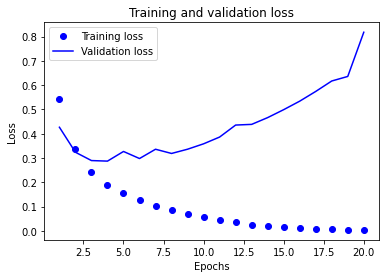

In [17]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
#acc = history.history['acc']
#val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the training and validation accuracy



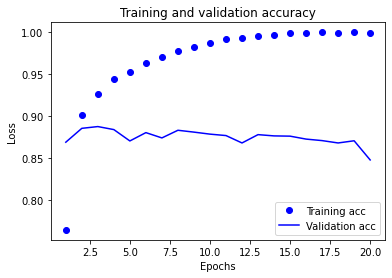

In [18]:
plt.clf() # clear figure
#acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Retraining a model from scratch


In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 8ms/step - loss: 0.4610 - accuracy: 0.8247
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2659 - accuracy: 0.9090
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2048 - accuracy: 0.9295
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2981 - accuracy: 0.8830


In [20]:
results

[0.29813578724861145, 0.8829600214958191]

### Using a trained model to generate predictions on new data


In [21]:
model.predict(x_test)

array([[0.18674609],
       [0.9987346 ],
       [0.5261905 ],
       ...,
       [0.10104203],
       [0.0541414 ],
       [0.5538197 ]], dtype=float32)